##  TP 1 : Reminder on Markov Chains <br> Stochastic gradient descent 

# Exercise 1 : Box-Muller and Marsaglia-Bray algorithm

Let $R$ a random variable with Rayleigh distribution with parameter 1 and $\Theta$ with uniform distribution on $[0, 2\pi]$. We also assume that $R$ and $\Theta$ are independent.
$$ \forall r \in \mathbb{R}, \qquad f_R(r)=rexp(-\frac{r^2}{2}) {1}_{\mathbb{R}^+}(r)$$

1. Let $X$ and $Y$ such that
$$
X = R cos(\Theta) \qquad \text{and} \qquad Y = R sin(\Theta). 
$$

Prove that both $X$ and $Y$ have $\mathcal{N}(0, 1)$ distribution and are independent.

<br>

2. Write an algorithm for sampling independent Gaussian distribution $\mathcal{N}(0, 1)$.

3. Consider the Marsaglia-Bray algorithm (cf. TP1_2021.pdf)
<br>
a) What is the distribution of $(V_1, V_2)$ at the end of the "while" loop ?
<br>
b) Set $$T_1 = \frac{V_1}{\sqrt{V_1^2+V_2^2}},  \qquad T_2 = \frac{V_2}{\sqrt{V_1^2+V_2^2}} \qquad  and \qquad   V=V_1^2+V_2^2$$
Show that $T=(T_1,T_2)$ and V are independent, $V\sim \mathcal{U}([0, 1])$ and $(T_1,T_2)$ has the same distribution as $(cos(\Theta),sin(\Theta))$ with $\Theta \sim \mathcal{U}([0, 2\pi])$.
<br> 
c) What is the distribution of the output $(X,Y)$?
<br>
d) What is the expected number of steps in the "while" loop ?


#### Answers :


1. Transfer theorem : $\forall h$ measurable,
$E[h(X,Y)]=E[h(R.cos(\Theta),R.sin(\Theta))] 
\\
\qquad \qquad =\int_{\mathbb{R}^+ \times [0,2\pi]} h(r.cos(\theta),r.sin(\theta)) \frac{1}{2\pi} rexp(-\frac{r^2}{2}) dr d\theta$

Changing to polar coordinates : $r.dr.d\theta \to dx.dy$ and $r=\sqrt{x^2+y^2}$ , it follows : 

$$E[h(X,Y)] = \int_{\mathbb{R}x\mathbb{R}} h(x,y) \frac{1}{2\pi} exp(-\frac{(x+y)^2}{2}) dx.dy = E[h(N_1,N_2)]$$
<br> 
with $N_1$ and $N_2$ $\sim \mathcal{N}(0, 1)$ that are independent. 

<br>

Finally, $X$ and $Y$ have $\mathcal{N}(0, 1)$ distribution and are independent.

<br> 

2. Independent Gaussian sampling 
<br> 
$\to$ Main idea : Use $R$ and $\Theta$. 
<br> 
$\to$ $\Theta$ has an uniform distribution.
<br> 
$\to$ To have $R$ : the way to do it is to make a simulation by reverse.
$F_{R}(u) = \int_{-\infty}^{u} r.exp(-\frac{r^2}{2}) dr = 2.(1-exp(-\frac{u^2}{2}))$

<br> 
Then, take $U \sim \mathcal{U}([0, 1])$ and then $R \sim F_{R}^{-1}(U)$

<br> 
$\to$ Finally, sample X and Y as in the previous question.

<br>

3. a) $(V_1, V_2)\sim$ an uniform distribution on the disk with centre the origin and radius 1. 
<br>
<br> 
b) Let's write $E[h(T_1,T_2,V)]=E[h(\frac{V_1}{\sqrt{V_1^2+V_2^2}},\frac{V_2}{\sqrt{V_1^2+V_2^2}},V_1^2+V_2^2)] 
\newline \qquad \qquad \quad \ \ 
= \int_{B(0,1)} h(\frac{v_1}{v_1^2+v_2^2},\frac{v_2}{v_1^2+v_2^2},v_1^2+v_2^2)\frac{1}{\pi} dv_1 . dv_2 
\newline 
\newline$

<br> 
because $\ f_{(V_1, V_2)}(v_1, v_2)= \frac{\mathbb{1}_{B(0,1)}(v_1,v_2)}{\vert B(0,1) \vert } = \frac{\mathbb{1}_{B(0,1)}(v_1,v_2)}{\pi}$ and by changing the coordinate : 


$$
\begin{cases}
cos(\theta) = \frac{v_1}{\sqrt{v_1^2+v_2^2}} \\
sin (\theta) = \frac{v_2}{\sqrt{v_1^2+v_2^2}} \\
v = v_1^2+v_2^2
\end{cases} 
$$

Then, 

$$ \qquad \qquad  \quad  \
\begin{cases}
v_1 = \sqrt{v}.cos(\theta) \\
v_2 = \sqrt{v}.sin(\theta) \\
dv_1 = -\sqrt{v}.sin(\theta) d\theta + \frac{cos(\theta)}{2\sqrt{v}}dv
\\
dv_2 = \sqrt{v}.cos(\theta) d\theta + \frac{sin(\theta)}{2\sqrt{v}}dv
\end{cases} 
$$

The Jacobian of this transformation equals $\frac{1}{2}$

<br> 

Finally, 
$$ E[h(T_1,T_2,V)]= \int_{[0,2\pi]x[0,1]} h(cos(\theta),sin(\theta),v) \frac{1}{2 \pi} d\theta dv $$ 

<br> 
<br> 

$\quad$ c) At the end, 

$$S = \sqrt{-2log(V_1^2+V_2^2)} \sim \mathcal{R}(1)$$

$$X = S.T_1 \quad and \quad Y = S.T_2$$

From the previous questions, $(X,Y) \sim \mathcal{N}(0,I_2)$

<br> 
<br> 

$\quad$ d) The "while" loop stops when $V_1^2+V_2^2  > 1$ and one can 
see it is equivalent to sampling $\quad$ a geometric law of probability : 

$\quad$ p = probability of being in the circle whose center is the origin and radius is 1 $=\frac{\vert Square([0,1]x[0,1])\vert}{\vert Circle(0,R=1)\vert}=\frac{1}{\pi}$

Then, the expected number of steps in the "while" loop is : 
$$ E[\mathcal{G}(p)]= \frac{1}{p} = \pi.$$

# Exercice 2 : Invariant distribution

We define a Markov chain $(Xn)_{n \leq 0}$ with values in $[0, 1]$ as follows : given the current value $X_n (n \in N)$ of the chain,

$\bullet$ if $X_n =\frac{1}{m}$ (for some positive integer m), we let :

$$
\begin{cases}
  X_{n+1}=\frac{1}{m+1} \ \ \ \ \ \ \ \ \ \ \ \ \text{with probability} \ \ \ 1-X_n^2 \\
  X_{n+1} \sim \mathcal{U}([\,0\,,1\,]) \ \ \ \text{with probability} \ \ \ X_n^2   
\end{cases}
$$

<br>

$\bullet$ If not, $X_{n+1} \sim \mathcal{U}([\,0\,,1\,])$

<br>

1. Prove that the transition kernel of the chain $(X_n)_{n \geq 0}$ is given by :

$$ P(x,A)=
\begin{cases}
x^2 \int_{A \cap [0,1]}dt +(1-x^2) \delta_{\frac{1}{m+1}}(A) \ \ \qquad if \ \ x=\frac{1}{m} \\
\int_{A \cap [0,1]}dt \qquad \qquad \qquad \qquad \qquad \text{otherwise}
\end{cases}
$$

<br> 

where $\delta_{\alpha}$ is the Dirac measure at $\alpha$.

<br>  

2. Prove that the uniform distribution on $[0, 1]$ is invariant for P. In the following, this invariant distribution will be denoted by $\pi$.


3. Let $x \notin \{ {\frac{1}{m}, \, m \in N^*} \}$. Compute the value of $Pf(x) = E[f(X_{1})|X_{0} = x]$ for a bounded measurable function $f$. Deduce $P^n f(x)$ for all $n \geq 1$. Compute $lim_{n \to +\infty} P^n f(x)$ in terms of $\int f(x) \pi(x)dx$.


4. Let $x=\frac{1}{m}$ with $m \geq 2$ :
<br> a) Let $n \in N^*$. Compute $P^n(x,\frac{1}{n+m})$ in terms of m and n.
<br> b) Do we have $lim_{n \to +\infty} P^n(x,A)=\pi(A)$ when $A=\bigcup\limits_{q \in N} \{\frac{1}{m+1+q}\}$ ?


#### Answers : 
1. 

$P(x,A)=\mathbb{P}(X_{n+1} \in A \vert X_{n} = x) = E[\mathbb{1}_{A}(X_{n+1}) \vert X_{n} = x]$

* If $x=\frac{1}{m}$ 

I can rewrite the definition of the Markov chain as follows :  


Let $B_n \sim \mathcal{B}(1-X_n^2)$ and $U_n \sim \mathcal{U}([\,0\,,1\,])$

$$
\begin{cases}
  X_{n+1}=\frac{1}{m+1} \ \ \ \ \ \text{if} \ \ \ B_n = 1\\
  X_{n+1}= U_n \ \ \ \ \ \ \ \text{otherwise}   
\end{cases}
$$


$P(x,A)=E[E[\mathbb{1}_{A}(X_{n+1}) \vert X_{n}=\frac{1}{m}, B_n] \vert X_{n} = x] \newline = \mathbb{P}(B_n=0)E[\mathbb{1}_{A}(X_{n+1}) \vert X_{n} = \frac{1}{m}, B_n = 0] + \mathbb{P}(B_n=1)E[\mathbb{1}_{A}(X_{n+1}) \vert X_{n} = \frac{1}{m}, B_n = 1] = \frac{1}{m^2}E[\mathbb{1}_{U_{n} \in A}] + (1-\frac{1}{m^2})\mathbb{1}_{\frac{1}{m+1} \in A}$


with $E[\mathbb{1}_{U_{n} \in A}] = \int_{A \cap [0,1]}dt$

<br>

* If $x \notin \{ {\frac{1}{m}, \, m \in N^*} \}$

$P(x,A) = E[\mathbb{1}_{A}(X_{n+1}) \vert X_{n} = x] = E[\mathbb{1}_{U_{n} \in A}] = \int_{A \cap [0,1]}dt$ 

<br>

Finally, $$ P(x,A)=
\begin{cases}
x^2 \int_{A \cap [0,1]}dt +(1-x^2) \delta_{\frac{1}{m+1}}(A) \ \ \qquad if \ \ x=\frac{1}{m} \\
\int_{A \cap [0,1]}dt \qquad \qquad \qquad \qquad \qquad \text{otherwise}
\end{cases}
$$


2. Let $X_0 \sim \mathcal{U}([\,0\,,1\,])$.

Let $f$ be a measurable function.

$E[f(X_{1})] = E_{X_{1}}[E_{X_{1}}[f(X_{1}) \vert X_{0}]] =  \int_{0}^{1} E_{X_{1}}[f(X_{1}) \vert X_{0} = x] dx$ 

$E_{X_{1}}[f(X_{1}) \vert X_{0} = x] = \int f(x_1)P(x, dx_1)$

However, if $x \notin \{ {\frac{1}{m}, \, m \in N^*} \}$ then $P(x,dx_1) = dx_1$ and since $\{ {\frac{1}{m}, \, m \in N^*} \}$ is countable, then : 

<br>
$E[f(X_{1})]= \int_{\{ {\frac{1}{m}, \, m \in N^*} \} \cap [0,1]} f(x) dx = \int_{0}^{1} f(x)dx = E[f(U_{1})]$ with $U_1 \sim \mathcal{U}([\,0\,,1\,])$

Thus, the uniform distribution on $[\,0\,,1\,]$ is invariant for $P$.

3. Let $x \notin \{ {\frac{1}{m}, \, m \in N^*} \}$.


$Pf(x) = E[f(X_{1})|X_{0} = x] = \int f(x_1)P(x, dx_1) = \int_{0}^{1} f(y) dy = \int_{\mathbb{R}} f(y) \pi(y) dy$

<br> 

Let's prove the result by induction.

One suppose that for $n \in \mathbb{N}_{\geq 1}$ :
$$P^n(f(x))=\int_{\mathbb{R}} f(y) \pi(y) dy$$
Then:
$$\begin{aligned}
P^{n+1}(f(x)) =  P(P^{n}(f(x))) = \int_{\mathbb{R}} P^{n}(f(z)) P(x,dz)  = \int_{0}^{1} P^{n}(f(z)) dz \newline = \int_{0}^{1} \int_{\mathbb{R}} f(y) \pi(y) dz dy =\int_{\mathbb{R}} f(y) \pi(y) dy
\end{aligned}$$

Then, $\forall n \in \mathbb{N}_{\geq 1}$ : 
$P^n(f(x))=\int_{\mathbb{R}} f(y) \pi(y) dy$

This means that:
$lim_{n \to +\infty} P^n f(x)=\int f(y) \pi(y)dy$

4. Let $x= \frac{1}{m}$ with $m\geq2$.

<br>

a) Let $n\in \mathbb{N}^*$. 

For $n=1$ we have: 

$$P(x, \frac{1}{m+1}) = P(\frac{1}{m}, \frac{1}{m+1}) = (1-(\frac{1}{m})^2)$$

<br>

For any n : 

$$P^{n+1}(x,\frac{1}{n+m+1}) = \int P(y,\frac{1}{n+m+1})P^{n}(x,dy)$$

<br>

However, 
$$P(y,\frac{1}{n+m+1})=
\begin{cases}
y^2 \int_{\{\frac{1}{n+m+1}\} \cap [0,1]}dt +(1-y^2) \delta_{\frac{1}{k+1}}(\frac{1}{n+m+1}) \ \ \qquad if \ \ y=\frac{1}{k} \\
\int_{\{\frac{1}{n+m+1}\} \cap [0,1]}dt \qquad \qquad \qquad \qquad \qquad \text{otherwise}
\end{cases}
$$

$$
= \begin{cases}
(1-y^2)  \ \ \qquad if \ \ y=\frac{1}{k} \ \ and \ \ k = n+m\\
0 \qquad \qquad \  \ \ \text{otherwise}
\end{cases}
$$

<br>
<br>

Then, $P^{n+1}(x,\frac{1}{n+m+1}) = (1-(\frac{1}{n+m})^2)P^{n}(x,\frac{1}{n+m})$


By induction on n, the result is as follows : 

$$ P^{n}(x,\frac{1}{n+m}) = \prod_{i=0}^{n-1} (1-(\frac{1}{m+i})^2)$$

<br>
<br>

b) Let $A=\bigcup\limits_{q \in N} \{\frac{1}{m+1+q}\}$ and $m\geq 2$

First of all, $$ \pi(A) = \sum_{q \in N} \pi(\{\frac{1}{m+1+q}\}) = 0$$

Let $n \in \mathbb{N}_{\geq1}$,

$P^n(\frac{1}{m},A) = \sum_{q \in N} P^n(\frac{1}{m},\frac{1}{m+1+q})
= P^n(\frac{1}{m},\frac{1}{m+n})  \newline$

$\qquad  \quad \ \ 
= \prod_{i=0}^{n-1} (1-(\frac{1}{m+i})^2)  
= \prod_{i=0}^{n-1} (\frac{(m+i)^2 - 1}{(m+i)^2}) 
= \prod_{i=0}^{n-1} (\frac{(m+i-1)*(m+i+1)}{(m+i)^2})$

$\qquad  \quad \ \ 
= \frac{\prod_{i=0}^{n-1}(m+i-1)*\prod_{i=0}^{n-1}(m+i+1)}{\prod_{i=0}^{n-1}(m+i)^2}
= \frac{\prod_{i=-1}^{n-2}(m+i)*\prod_{i=1}^{n}(m+i)}{\prod_{i=0}^{n-1}(m+i)^2}
= \frac{(m-1)*(m+n)}{m*(m+n-1)}$  

$\qquad  \quad \ \ 
= \frac{m-1}{m}*(1+ \frac{1}{m+n-1})  \newline$

$\qquad  \quad \ \ 
\geq \frac{1}{2}  \gt \pi(A)=0$
 
<br>

Finally,  
$$lim_{n  \to +\infty} P^n(\frac{1}{m},A) \ne \pi(A) $$

The distribution is not invariant.

# Exercice 3 : Stochastic Gradient Learning in Neural Networks

#### 1. Describe the stochastic gradient descent algorithm for minimizing the empirical risk and implement it.

We consider the following problem :
$$min_{\forall w \in \mathbb{R}^d} R(w) = \mathbb{E}[J(w, z)] = \int (y - w^\mathsf{T}x)^2 \, \mathrm{d\mathbb{P}}(z)$$

where $z = (x,y) = (z_i = (x_i, y_i))_{1\leq i \leq n})$ represents the observations and $R$ the expected risk given a parameter vector $w$ with respect to the probability $\mathbb{P}$.

While it may be desirable to minimize the expected loss that would be incurred from any input -
output pair, such a goal is untenable when one does not have complete information about $\mathbb{P}$. The idea is then to seek the solution of a problem that involves an estimate of the expected risk $R$, which is here the empirical risk function $R_n : \mathbb{R}^d \rightarrow \mathbb{R}$ given by:
$$ R_n(w) = \mathbb{E}_{\mu} \left[ J(w, z) \right] = \dfrac{1}{n} \sum_{i = 1}^n ( y_i - w^\mathsf{T} x_i)^2 $$
with $n$ the number of observations $\mu$ the uniform distribution on the observations $z$.

The stochastic gradient descent algorithm is a variant of the gradient descent algorithm, which is sometimes too costly to use especially in high dimension.  Here is how it works: 

While the stop criterion$^*$ is not satisfied : 

1. A sequence IID of realizations of $z : (z_{[1]}, ... z_{[k]}, ...)$ is randomly drawn according to the same law $\mu$. Here, the goal is to minimize the empirical risk and then the law is uniform regarding the observations.

2. The update of $w_{k+1}$ is done with a simulated value of $z_{[k+1]}$ by a gradient step of the function J. Then, $w_{k+1} = proj_{\mathcal{U}_c}[w_k - \epsilon_k * \nabla_w J(w_k, z_{[k+1]})]$ with $\mathcal{U}_c$ a convex set and $(\epsilon_i)_{1\leq i \leq n}$ a sequence of gradient step that I will explicit after.


<br>

However, we must ensure the convergence of this algorithm. The mean square convergence theorem certifies the mean square convergence to a solution of this problem under the following assumptions: 

($H_1$) : the random variable $\begin{array}{ccccc} J_w  :  (z_i = (x_i, y_i))_{1\leq i \leq n}) \to \mathbb{R} \\  z \mapsto J(w,z) \\ \end{array}$ is measurable and its expectation exists for all w in  $\mathcal{U}_c$.

($H_2$) : the function $w\mapsto J(w,z)$ is convex, lower semicontinuous and differentiable for all w in $\mathcal{U}_c$.

($H_3$) : $\exists n>0$ such that $\forall w \in \mathcal{U}_c$, $\forall z \in (z_i = (x_i, y_i))_{1\leq i \leq n})$ 
$$\left| \nabla_w J(w, z) \right| \leqslant n$$

($H_4$) : the problem $min_{\forall w \in \mathcal{U}_c} R(w)$ has a nonempty set of solution.

($H_5$) : the sequence $(\epsilon_i)_{1\leq i \leq n}$ is such that 
$\sum_{k \geq 1} \epsilon_k = + \infty$ and $\sum_{k \geq 1} \epsilon_k^2 < + \infty$.


With linearly separable data, $J : (w, z_i = (x_i, y_i)) \mapsto (y_i - w^\mathsf{T} x_i)^2$, $\, \mathcal{U}_c = \mathcal{B}(0,1)$ and $\, \forall k \geq 1, \, \epsilon_k = \frac{1}{k}$ then all assumptions are satisfied.

<br>
$^*$ In the course, the best consistent stop criterion is the number of iteration steps of the algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
def grad(X,y,w):
    """Gradient calculation.
    Parameters
    ----------
    X : data
    y : labels
    w : normal vector
    """
    return -2 * (y-np.dot(w.T, X)) * X

def projConvex(w):
    """Projection on the norm ball of radius 1.
    Parameters
    ----------
    w : vector 
    """
    return (np.linalg.norm(w)>1) * w / np.linalg.norm(w) + (np.linalg.norm(w) <= 1) * w

def stochasticGradientDescent(w0, epsilon, X, y, end):
    """The stochastic gradient descent algorithm.
    Parameters
    ----------
    w0 : starting point
    epsilon : sequence of gradient step
    X : data
    y : labels
    end : number of iterations
    """
    w = projConvex(w0)
    
    for k in range(end):
        
        z_k = randint(0,X.shape[0]-1)
        w = projConvex(w - epsilon[k] * grad(X[z_k],y[z_k],w))
        
    return w / np.linalg.norm(w)

#### 2. Sample a set of observations ${z_i}^{n}_{i=1}$ by generating a collection of random points $x_i$ of $\mathbb{R}^2$, $\bar{w} \in \mathbb{R}^2$ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane the point $x_i$ is.

In [3]:
# Initialization

# Number of observations
n = 1000 

# I add a column of 1 to the data matrix for the intercept
X = np.ones((n,3))
X[:,0:2] = np.random.rand(n,2)
w = projConvex(np.array([-1,1,0]))
y = np.sign(X@w)
w0 = np.random.rand(3)
epsilon = np.array([1./i for i in range(1,100000)])

In [4]:
# Label differentiation

X1 = X[np.where(y==1)[0]]
y1 = y[np.where(y==1)[0]]
X2 = X[np.where(y==-1)[0]]
y2 = y[np.where(y==-1)[0]]

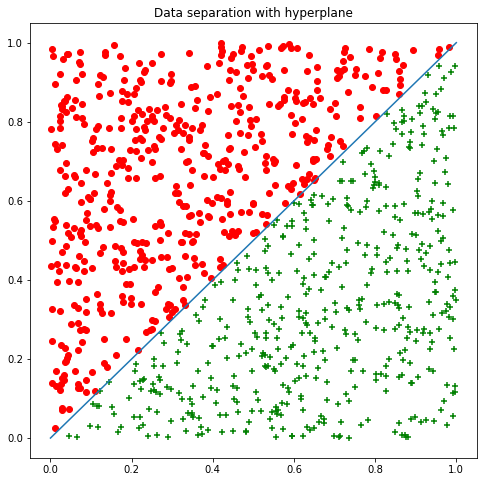

In [5]:
# The separating hyperplane

z = np.linspace(0,1,11)
h = (-w[0]*z - w[2])/w[1]

# Data separation plot 

plt.figure(figsize=(8,8))
plt.title('Data separation with hyperplane')
plt.scatter(X1[:,0],X1[:,1], c = 'red', marker = 'o')
plt.scatter(X2[:,0],X2[:,1], c = 'green', marker = '+')
plt.plot(z,h)
plt.show()

#### 3. Test the algorithm you wrote at the first question over these observations. What is the vector $w^*$ estimated ? Is it far from $\bar{w}$ ?

In [6]:
# Implementation of functions that score the accuracy of the estimate

def relativeError(w, w_estimated):
    """Calculates the relative error of the estimate.
    Parameters
    ----------
    w : target vector
    w_estimation : the estimate vector
    """
    return np.linalg.norm(w - w_estimated)/np.linalg.norm(w)*100

def scoreSGD(X, y, w): 
    """Compute the score of the hyperplane given by the normal vector w on the observations of z = (X,y). 
    The score is percentage of correctly predicted observations.
    Parameters
    ----------
    X : data
    y : labels
    w : estimate normal vector
    """
    assert (len(X)==len(y))
    n = len(X)
    score = 0
    for i in range(n):
        if y[i]*np.dot(w, X[i]) > 0: 
            score += 1
    return score / n * 100

In [7]:
# Test of the algorithm accuracy

w_star = stochasticGradientDescent(w0, epsilon, X, y, end = 1000)
error = relativeError(w, w_star)
score = scoreSGD(X,y,w_star)
print("The relative error is : %.2f" % error, "%")
print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The relative error is : 2.02 %
The percentage of correctly predicted observations is : 98.10 %


In that case, $w^*$ estimated is it not far from $\bar{w}$ and this comparison is consistent because I have renormalized the vectors, which have a norm of 1. 

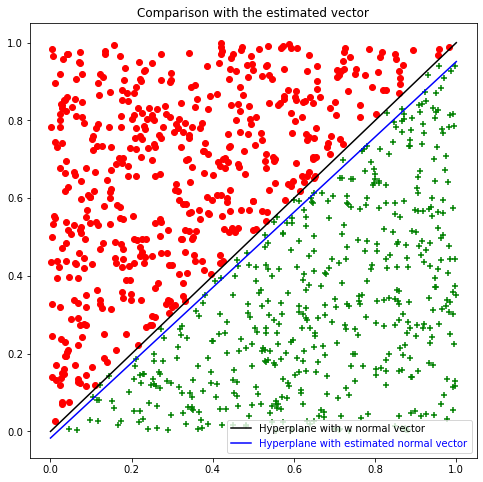

In [8]:
# The separating hyperplane given by the estimate

h_star = (-w_star[0]*z - w_star[2])/w_star[1]

# Visual difference plot

plt.figure(figsize=(8,8))
plt.title('Comparison with the estimated vector')
plt.scatter(X1[:,0],X1[:,1], c = 'red', marker = 'o')
plt.scatter(X2[:,0],X2[:,1], c = 'green', marker = '+')
plt.plot(z,h, c = 'black',  )
plt.plot(z,h_star, c = 'blue')
plt.legend(labels = ['Hyperplane with w normal vector', 'Hyperplane with estimated normal vector' ], 
           labelcolor = ['black', 'blue'], loc = 'lower right')
plt.show()

The results are very good. However, the fact that this algorithm is stochastic implies that the results can be very different depending on the tests. I ran several tests to see how much the results can vary.

In [9]:
# Tests with different initial condition

for i in range(10):
    w0 = np.random.rand(3)
    w_star = stochasticGradientDescent(w0, epsilon, X, y, end = 1000)
    w_star = w_star/np.linalg.norm(w_star)
    error = relativeError(w, w_star)
    score = scoreSGD(X,y,w_star)
    print("The relative error is : %.2f" % error, "%")
    print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The relative error is : 7.59 %
The percentage of correctly predicted observations is : 94.80 %
The relative error is : 5.36 %
The percentage of correctly predicted observations is : 95.60 %
The relative error is : 3.27 %
The percentage of correctly predicted observations is : 99.00 %
The relative error is : 8.77 %
The percentage of correctly predicted observations is : 93.50 %
The relative error is : 5.47 %
The percentage of correctly predicted observations is : 97.00 %
The relative error is : 3.90 %
The percentage of correctly predicted observations is : 97.50 %
The relative error is : 3.41 %
The percentage of correctly predicted observations is : 95.80 %
The relative error is : 17.74 %
The percentage of correctly predicted observations is : 94.20 %
The relative error is : 4.37 %
The percentage of correctly predicted observations is : 96.90 %
The relative error is : 6.36 %
The percentage of correctly predicted observations is : 97.90 %


In [10]:
# Tests with different number of steps

w0 = np.random.rand(3) 
endstep = [10, 20, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
for i in range(10):
    w_star = stochasticGradientDescent(w0, epsilon, X, y, end = endstep[i])
    w_star = w_star/np.linalg.norm(w_star)
    error = relativeError(w, w_star)
    score = scoreSGD(X,y,w_star)
    print("The relative error is : %.2f" % error, "% with end =", endstep[i])
    print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The relative error is : 81.18 % with end = 10
The percentage of correctly predicted observations is : 49.00 %
The relative error is : 17.76 % with end = 20
The percentage of correctly predicted observations is : 92.20 %
The relative error is : 15.74 % with end = 100
The percentage of correctly predicted observations is : 83.10 %
The relative error is : 11.90 % with end = 200
The percentage of correctly predicted observations is : 90.50 %
The relative error is : 12.55 % with end = 500
The percentage of correctly predicted observations is : 94.90 %
The relative error is : 5.91 % with end = 1000
The percentage of correctly predicted observations is : 96.60 %
The relative error is : 5.29 % with end = 2000
The percentage of correctly predicted observations is : 94.40 %
The relative error is : 8.16 % with end = 5000
The percentage of correctly predicted observations is : 97.80 %
The relative error is : 1.49 % with end = 10000
The percentage of correctly predicted observations is : 98.40 %
Th

One can observe that the results do not depend too much on the initial condition and the number of steps when there are enough of them (here, at least 1000) but they vary due to the fact that this algorithm is stochastic. 

#### 4. Noise your observations $(z_i)^n_{i=1}$ with an additive Gaussian noise and perform the optimisation again. Compare with the result of question three.

In [11]:
# Data noising

Gaussian_Noise = (0.1*np.random.randn(2,n)).T
X[:,0:2] = X[:,0:2] + Gaussian_Noise
X1 = X[np.where(y==1)[0]]
y1 = y[np.where(y==1)[0]]
X2 = X[np.where(y==-1)[0]]
y2 = y[np.where(y==-1)[0]]

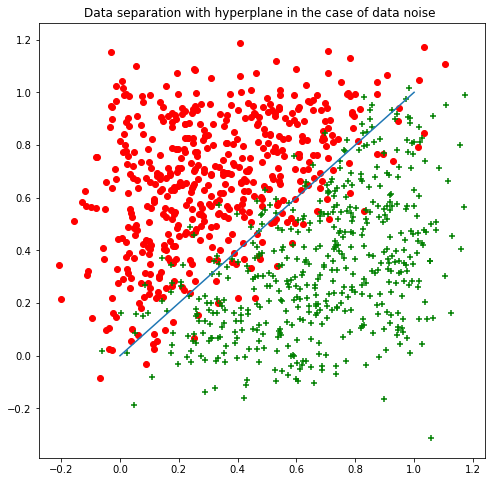

In [12]:
# Data with noise plot

plt.figure(figsize=(8,8))
plt.title('Data separation with hyperplane in the case of data noise ')
plt.scatter(X1[:,0],X1[:,1], c = 'red', marker = 'o')
plt.scatter(X2[:,0],X2[:,1], c = 'green', marker = '+')
plt.plot(z,h)
plt.show()

In [13]:
# Test of the algorithm accuracy

w_star = stochasticGradientDescent(w0, epsilon, X, y, end = 1000)
error = relativeError(w, w_star)
score = scoreSGD(X,y,w_star)
print("The relative error is : %.2f" % error, "%")
print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The relative error is : 4.40 %
The percentage of correctly predicted observations is : 90.10 %


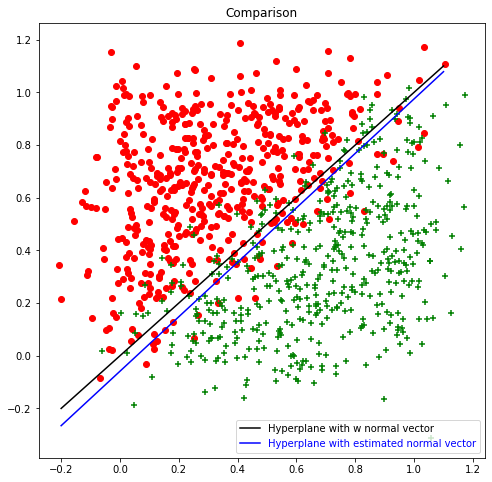

In [14]:
# The separating hyperplanes

z = np.linspace(-0.2,1.1,11)
h = (-w[0]*z -w[2])/w[1]
h_star = (-w_star[0]*z - w_star[2])/w_star[1]

# Visual difference plot

plt.figure(figsize=(8,8))
plt.title('Comparison')
plt.scatter(X1[:,0],X1[:,1], c = 'red', marker = 'o')
plt.scatter(X2[:,0],X2[:,1], c = 'green', marker = '+')
plt.plot(z,h, c = 'black')
plt.plot(z,h_star, c = 'blue')
plt.legend(labels = ['Hyperplane with w normal vector', 'Hyperplane with estimated normal vector' ], 
           labelcolor = ['black', 'blue'], loc = 'lower right')
plt.show()

The result is less convincing than in the previous questions. The vector $w^*$ is relatively close to $\bar{w}$  but the labels are not as well classified as in the previous question. The reason could be the fact that the data is no longer linearly separable and thus the assumption ($H_4$) of the mean square convergence theorem is not always satisfied.

#### 5. Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set [WSM95] : http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 .

In [15]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [16]:
# Data representation

data = pd.read_csv('breast-cancer-wisconsin.data', sep = ',', header = None)
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
                'Normal Nucleoli', 'Mitoses', 'y']

data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,y
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [17]:
X_bc = data[data.columns[1:-1]].values
print(np.where(X_bc == '?'))

(array([ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
       321, 411, 617]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))


I notice that some values are missing and they have been replace by the value "?". I decided to drop them from the table. Moreover, the labels in the database are (2 for benign, 4 for malignant) and I chose to replace them by (1 for benign, -1 for malignant)

In [18]:
# Data preprocessing

data.drop(np.where(X_bc == '?')[0],0, inplace=True)

# I add a column of 1 to the data matrix for the intercept
X_bc = np.ones((len(data),len(data.columns)-1))
print(" X_bc shape :", X_bc.shape)
print("Values data shape :", data[data.columns[1:-1]].shape)


X_bc[:,0:-1] = np.array(data[data.columns[1:-1]].values, dtype = int)
y_bc = np.where(data['y']==2,1,-1)

data['y'] = y_bc

 X_bc shape : (683, 10)
Values data shape : (683, 9)


In [19]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,y
0,1000025,5,1,1,1,2,1,3,1,1,1
1,1002945,5,4,4,5,7,10,3,2,1,1
2,1015425,3,1,1,1,2,2,3,1,1,1
3,1016277,6,8,8,1,3,4,3,7,1,1
4,1017023,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,1
695,841769,2,1,1,1,2,1,1,1,1,1
696,888820,5,10,10,3,7,3,8,10,2,-1
697,897471,4,8,6,4,3,4,10,6,1,-1


In [20]:
# Data renormalization
 
scaler = preprocessing.StandardScaler()

# I don't renormalize the last column which corresponds to the intercept
X_bc_scaled = X_bc 
X_bc_scaled[:,0:-1] = scaler.fit_transform(X_bc[:,0:-1])

In [21]:
# Running the SGD

w0 = np.random.rand(X_bc.shape[1])
w_star_bc = stochasticGradientDescent(w0, epsilon, X_bc_scaled, y_bc, end = 100)

In [22]:
score = scoreSGD(X_bc_scaled, y_bc, w_star_bc)
print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The percentage of correctly predicted observations is : 95.31 %


In [23]:
# Checking for overfitting

X_train, X_test, y_train, y_test = train_test_split(X_bc_scaled, y_bc, test_size=0.25)
w_star_bc = stochasticGradientDescent(w0, epsilon, X_train, y_train, end = 100)
train_score = scoreSGD(X_train, y_train, w_star_bc)
test_score = scoreSGD(X_test, y_test, w_star_bc)
print("The train score is : %.2f" % train_score, "%")
print("The test score is : %.2f" % test_score, "%")

The train score is : 94.34 %
The test score is : 96.49 %


## Test of the algorithm on the Breast Cancer Wisconsin (Diagnostic)

In [24]:
# Data representation

data_diagnostic = pd.read_csv('wdbc.data', sep = ',', header = None)
data_diagnostic.columns = ['id', 'y', 'radius_mean', 'texture_mean', 'perimeter_mean', 
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
                'concave points_mean', 'symmetry_mean','fractal_dimension_mean', 'radius_se', 
                'texture_se','perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
                'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
                'fractal_dimension_worst']

data_diagnostic

,id,y,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
X_bcd = data_diagnostic[data_diagnostic.columns[2:]].values

In this data set, there is no missing value.

In [26]:
# Data preprocessing
y_bcd = np.where(data_diagnostic['y']=='M',1,-1)
data_diagnostic['y'] = y_bcd
data_diagnostic

,id,y,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
# Data renormalization
 
scaler = preprocessing.StandardScaler()

# I don't renormalize the last column which corresponds to the intercept
X_bcd_scaled = X_bcd
X_bcd_scaled[:,0:-1] = scaler.fit_transform(X_bcd[:,0:-1])

In [28]:
# Running the SGD

w0 = np.random.rand(X_bcd_scaled.shape[1])
w_star_bcd = stochasticGradientDescent(w0, epsilon, X_bcd_scaled, y_bcd, end = 100)

In [29]:
score = scoreSGD(X_bcd_scaled, y_bcd, w_star_bcd)
print("The percentage of correctly predicted observations is : %.2f" % score, "%")

The percentage of correctly predicted observations is : 72.23 %


In [30]:
# Checking for overfitting

X_train, X_test, y_train, y_test = train_test_split(X_bcd_scaled, y_bcd, test_size=0.25)
w_star_bcd = stochasticGradientDescent(w0, epsilon, X_train, y_train, end = 100)
train_score = scoreSGD(X_train, y_train, w_star_bcd)
test_score = scoreSGD(X_test, y_test, w_star_bcd)
print("The train score is : %.2f" % train_score, "%")
print("The test score is : %.2f" % test_score, "%")

The train score is : 93.66 %
The test score is : 93.71 %


### Conclusion

The result of the stochastic gradient descent on this dataset is impressive. Furthermore, I checked if the algorithm had a tendency to overfit, but as can be seen there is no overfitting. I can conclude that the dataset is rather linearly separable and that it is possible to predict the type of breast cancer thanks well with the data. To go further, I can suggest to change the algorithm in order to unbalance the classification between malignant and benign cancers by creating for example a classification function that for a zone of uncertainty (where there is a chance to have the two different labels) prefers to classify the data as malignant. By doing this, even if there are so-called false-positive cases and the accuracy of the algorithm decreases, all malignant cancers are well classified.